<a href="https://colab.research.google.com/github/Chandrashekar0123/Lerno-ML-case-study/blob/main/HIERARCHICAL_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HIERARCHICAL CLUSTERING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline


In [2]:
beer_df = pd.read_csv("/content/beer.csv")
beer_df


,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [3]:
from sklearn.preprocessing import StandardScaler


In [4]:
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform(beer_df[["calories",
 "sodium","alcohol","cost"]])


Using Dendrogram

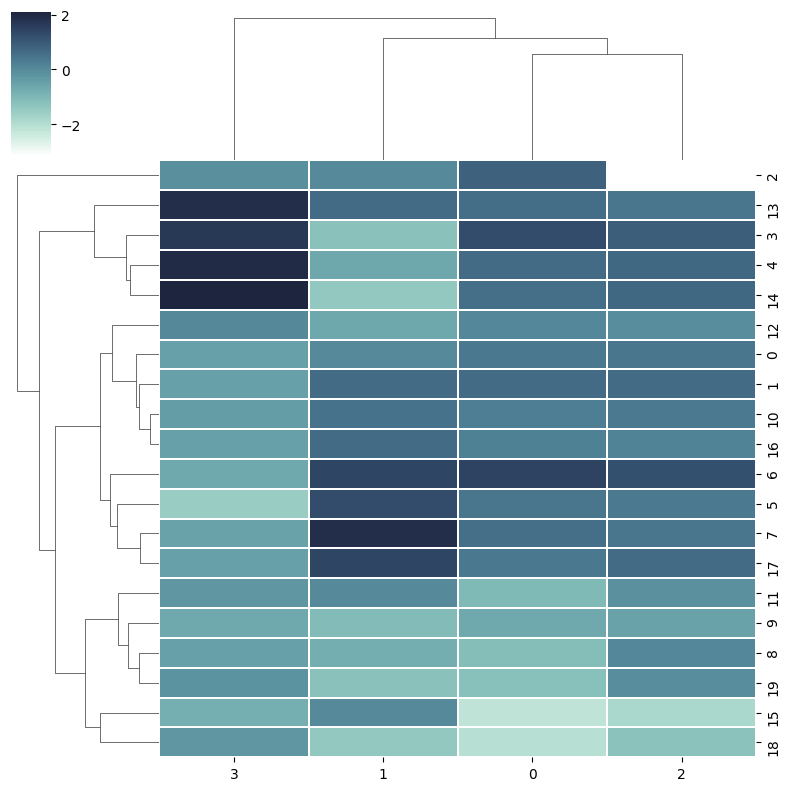

In [5]:

cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap( scaled_beer_df, cmap=cmap, linewidths=.2,figsize = (8,8));

In [6]:
beer_df.iloc[[10,16]]


,name,calories,sodium,alcohol,cost
10,Coors,140,18,4.6,0.44
16,Hamms,139,19,4.4,0.43


In [7]:
beer_df.iloc[[2,18]]


,name,calories,sodium,alcohol,cost
2,Lowenbrau,157,15,0.9,0.48
18,Olympia_Goled_Light,72,6,2.9,0.46


In [8]:
from sklearn.cluster import KMeans


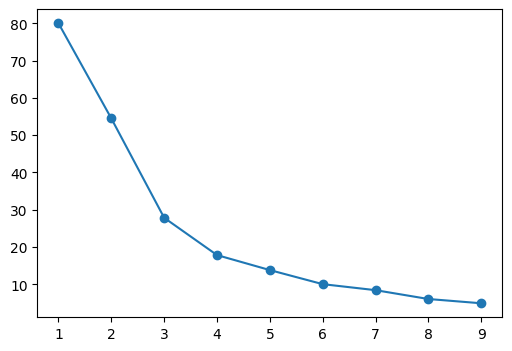

In [9]:
cluster_range = range(1, 10)
cluster_errors = []
for num_clusters in cluster_range:
 clusters = KMeans(num_clusters)
 clusters.fit(scaled_beer_df)
 cluster_errors.append(clusters.inertia_)
plt.figure(figsize=(6,4))
plt.plot(cluster_range, cluster_errors, marker = "o");

In [10]:
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform (beer_df[["calories",
 "sodium", "alcohol","cost"]])


In [11]:
scaled_beer_df


array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [12]:
k = 3
clusters = KMeans(k, random_state = 42)
clusters.fit(scaled_beer_df)
beer_df["clusterid"] = clusters.labels_


In [13]:
clusters.labels_


array([0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1],
      dtype=int32)

In [14]:
beer_df[beer_df.clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
13,Becks,150,19,4.7,0.76,0
16,Hamms,139,19,4.4,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0


In [15]:
beer_df[beer_df.clusterid == 1]


,name,calories,sodium,alcohol,cost,clusterid
3,Kronenbourg,170,7,5.2,0.73,1
4,Heineken,152,11,5.0,0.77,1
8,Miller_Lite,99,10,4.3,0.43,1
9,Budweiser_Light,113,8,3.7,0.40,1
11,Coors_Light,102,15,4.1,0.46,1
12,Michelob_Light,135,11,4.2,0.50,1
14,Kirin,149,6,5.0,0.79,1
15,Pabst_Extra_Light,68,15,2.3,0.38,1
18,Olympia_Goled_Light,72,6,2.9,0.46,1
19,Schlitz_Light,97,7,4.2,0.47,1


In [17]:
beer_df[beer_df.clusterid == 2]


,name,calories,sodium,alcohol,cost,clusterid
2,Lowenbrau,157,15,0.9,0.48,2


HIERARCHICAL CLUSTERING


In [18]:

from sklearn.cluster import AgglomerativeClustering



In [19]:

h_clusters = AgglomerativeClustering(3)
h_clusters.fit(scaled_beer_df)

AgglomerativeClustering(n_clusters=3)

In [20]:
beer_df["h_clusterid"] = h_clusters.labels_


In [21]:


h_clusters.labels_

array([1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0])

In [22]:
beer_df[beer_df.h_clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
2,Lowenbrau,157,15,0.9,0.48,2,0
8,Miller_Lite,99,10,4.3,0.43,1,0
9,Budweiser_Light,113,8,3.7,0.40,1,0
11,Coors_Light,102,15,4.1,0.46,1,0
12,Michelob_Light,135,11,4.2,0.50,1,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1,0
18,Olympia_Goled_Light,72,6,2.9,0.46,1,0
19,Schlitz_Light,97,7,4.2,0.47,1,0


In [23]:
beer_df[beer_df.h_clusterid == 1]


,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
0,Budweiser,144,15,4.7,0.43,0,1
1,Schlitz,151,19,4.9,0.43,0,1
5,Old_Milwaukee,145,23,4.6,0.28,0,1
6,Augsberger,175,24,5.5,0.40,0,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1
10,Coors,140,18,4.6,0.44,0,1
16,Hamms,139,19,4.4,0.43,0,1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1


In [24]:
beer_df[beer_df.h_clusterid == 2]


,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
3,Kronenbourg,170,7,5.2,0.73,1,2
4,Heineken,152,11,5.0,0.77,1,2
13,Becks,150,19,4.7,0.76,0,2
14,Kirin,149,6,5.0,0.79,1,2
